In [1]:
import pandas as pd
import numpy as np

In [2]:
import requests
import re

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt

# hospitales

In [5]:
#hospitalizados
cdmx= pd.read_csv('/Users/rube/Downloads/traslados-a-hospitales.csv')
cdmx

,Fecha,Alcaldia Inicio,Sector Inicio,LOCATEL,LUGAR DE TRASLADO
0,2020-03-27,MIGUEL HIDALGO,Polanco-Castillo,SI,H. PRIVADO ESPAÑOL
1,2020-03-29,BENITO JUAREZ,Narvarte-Alamos,SI,ISSSTE H. R. GRAL. IGNACIO ZARAGOZA
2,2020-03-31,IZTAPALAPA,Quetzal,SI,IMSS H. G. Z. 28 GABRIEL MANCERA
3,2020-04-03,BENITO JUAREZ,Del Valle,SI,ISSSTE CTO. MED. NAL. 20 DE NOVIEMBRE
4,2020-04-11,GUSTAVO A. MADERO,Pradera,SI,SEDESA H. G. DE LA VILLA
...,...,...,...,...,...
2020,2020-09-05,GUSTAVO A. MADERO,Pradera,SI,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ
2021,2020-09-05,IZTAPALAPA,Estrella,SI,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ
2022,2020-09-05,AZCAPOTZALCO,Claveria,SI,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ
2023,2020-09-05,VENUSTIANO CARRANZA,Congreso,SI,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ


In [6]:
cdmx.drop(['Alcaldia Inicio', 'Sector Inicio', 'LOCATEL'], inplace=True, axis=1)

In [7]:
imsscdmx = cdmx[cdmx['LUGAR DE TRASLADO'].apply(lambda x:x.startswith('IMSS'))] #seleccionó solo imss

In [8]:
imsscdmx

,Fecha,LUGAR DE TRASLADO
2,2020-03-31,IMSS H. G. Z. 28 GABRIEL MANCERA
5,2020-04-12,IMSS H. G. Z. 27 TLATELOLCO
7,2020-04-20,IMSS H. G. Z. 8 SAN ÁNGEL
16,2020-05-11,IMSS H. G. Z. 47 VICENTE GUERRERO
17,2020-05-12,IMSS H. G. Z. 1-A DR. RODOLFO ANTONIO DE MUCHA...
...,...,...
2019,2020-09-04,IMSS H. G. Z. 1 CARLOS MAC GREGOR
2020,2020-09-05,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ
2021,2020-09-05,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ
2022,2020-09-05,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ


In [9]:
#paso a fecha el indice
imsscdmx['Fecha']= pd.to_datetime(imsscdmx['Fecha'])
imsscdmx.index = pd.DatetimeIndex(imsscdmx['Fecha'])
imsscdmx.drop(['Fecha'], axis=1, inplace=True)
imsscdmx

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


,LUGAR DE TRASLADO
Fecha,
2020-03-31,IMSS H. G. Z. 28 GABRIEL MANCERA
2020-04-12,IMSS H. G. Z. 27 TLATELOLCO
2020-04-20,IMSS H. G. Z. 8 SAN ÁNGEL
2020-05-11,IMSS H. G. Z. 47 VICENTE GUERRERO
2020-05-12,IMSS H. G. Z. 1-A DR. RODOLFO ANTONIO DE MUCHA...
...,...
2020-09-04,IMSS H. G. Z. 1 CARLOS MAC GREGOR
2020-09-05,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ
2020-09-05,IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ


In [10]:
imsscdmx['LUGAR DE TRASLADO'].value_counts().head(10)

IMSS H. G. Z. 47 VICENTE GUERRERO                              100
IMSS H. G. Z. 1-A DR. RODOLFO ANTONIO DE MUCHA M. (VENADOS)     88
IMSS H. G. Z. 24 INSURGENTES                                    84
IMSS H. G. Z. 27 TLATELOLCO                                     82
IMSS H. G. Z. 8 SAN ÁNGEL                                       74
IMSS H. G. Z. 2A TRONCOSO                                       74
IMSS H. G. Z. 30 IZTACALCO                                      48
IMSS H. G. Z. 1 CARLOS MC GREGOR                                48
IMSS H. G. R. 02 TRAUMATOLOGIA Y ORTOPEDIA VILLA COAPA          45
IMSS H. G. Z. 29 SAN JUAN DE ARAGON                             40
Name: LUGAR DE TRASLADO, dtype: int64

In [11]:
#por hospital
hospitalizados = (pd.get_dummies(imsscdmx)).groupby('Fecha').agg('sum')
hospitalizados

,LUGAR DE TRASLADO_IMSS CLINICA 47 VICENTE GUERRERO,LUGAR DE TRASLADO_IMSS CLINICA 8 SAN ÁNGEL,LUGAR DE TRASLADO_IMSS CTO. MED. NAL. LA RAZA,LUGAR DE TRASLADO_IMSS CTO. MED. NAL. SIGLO XXI,LUGAR DE TRASLADO_IMSS H. DE EXPANSIÓN AUTODROMO HERMANOS RODRIGUEZ,LUGAR DE TRASLADO_IMSS H. G. R. 02 TRAUMATOLOGIA Y ORTOPEDIA VILLA COAPA,LUGAR DE TRASLADO_IMSS H. G. R. 194 NAUCALPAN,LUGAR DE TRASLADO_IMSS H. G. R. 196 ECATEPEC,LUGAR DE TRASLADO_IMSS H. G. R. 200 TECAMAC,LUGAR DE TRASLADO_IMSS H. G. R. 220,...,LUGAR DE TRASLADO_IMSS H. G. Z. 53 LOS REYES LA PAZ,LUGAR DE TRASLADO_IMSS H. G. Z. 58 SANTA MONICA,LUGAR DE TRASLADO_IMSS H. G. Z. 71 CHALCO,LUGAR DE TRASLADO_IMSS H. G. Z. 72 TLALNEPANTLA,LUGAR DE TRASLADO_IMSS H. G. Z. 73 ECATEPEC,LUGAR DE TRASLADO_IMSS H. G. Z. 76 XALOSTOC,LUGAR DE TRASLADO_IMSS H. G. Z. 8 SAN ÁNGEL,LUGAR DE TRASLADO_IMSS H. G. Z. 98 COACALCO,LUGAR DE TRASLADO_IMSS H. TRAUMATOLOGIA Y ORTOPEDIA,LUGAR DE TRASLADO_IMSS U.M.F. 38 ROMA
Fecha,,,,,,,,,,,,,,,,,,,,,
2020-03-19,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-03-31,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-02,0,0,0,0,0,2,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2020-09-03,0,0,0,0,0,2,1,0,0,0,...,0,0,0,0,0,0,2,0,0,0
2020-09-04,0,0,0,0,1,2,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


<AxesSubplot:xlabel='Fecha'>

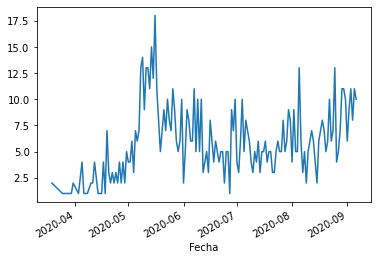

In [12]:
#todo imss cdmx
imssfecha=imsscdmx.groupby('Fecha').agg('count')

imssfecha['LUGAR DE TRASLADO'].plot()

# sinave

In [13]:
#casos reportados negativos y positivos
sinave= pd.read_csv('/Users/rube/Downloads/base-covid-sinave.csv')
sinave

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (78,79,84,87,88,89) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,origen,sector,cve_entidad_unidad_medica,entidad_unidad_medica,delegacion_unidad_medica,unidad_medica,fecha_de_registro,sexo,entidad_residencia,cve_entidad_residencia,...,dias_puerperio,antipireticos,unidad_cuidados_intensivos,linaje_influenza_tipo_b,viaje_1,viaje_2,viaje_3,viaje_4,viaje_5,rango_de_edad
0,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HOSPITAL GENERAL AJUSCO MEDIO,2020-07-15,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,06-15
1,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III DR. ATANACIO GARZA RIOS,2020-05-19,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-40
2,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III DR. IGNACIO MORONES PRIETO,2020-09-08,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61-70
3,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III DR GASTON MELO,2020-08-14,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-60
4,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III DR. JOSE MA. RODRIGUEZ,2020-09-18,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61-70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418470,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III LA NAVIDAD,2020-07-06,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61-70
418471,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III LA NAVIDAD,2020-07-02,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-60
418472,FUERA DE USMI,SSA,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,C.S.T-III DR. GUILLERMO ROMAN Y CARRILLO,2020-07-18,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51-60
418473,FUERA DE USMI,ISSSTE,9,CIUDAD DE MEXICO,D.F. ZONA NORTE,DR. DARIO FERNANDEZ FIERRO,2020-04-28,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,SI,NO,NaN,NaN,NaN,NaN,NaN,NaN,31-40


In [14]:
sinave['resultado_definitivo'].value_counts()

NEGATIVO               233772
SARS-CoV-2             144917
RECHAZADA                5850
NO ADECUADO              2848
NO RECIBIDA              2257
B                         192
INF AH1N1 PMD             116
NO SUBTIPIFICADO           54
A H3                       51
ENTEROV//RHINOVIRUS        30
NO AMPLIFICO               21
METAPNEUMOVIRUS            16
CORONA NL63                14
SIN CELULAS                11
INF A                       8
CORONA 229E                 8
VSR                         5
CORONA HKU1                 5
VSR A                       3
CORONA OC43                 3
ADENOVIRUS                  2
CORONA SARS                 2
PARAINFLUENZA 1             2
BOCAVIRUS                   2
SARS-CoV                    1
VSR B                       1
PARAINFLUENZA 2             1
Name: resultado_definitivo, dtype: int64

In [212]:
sinave_imss = sinave[sinave['sector']=='IMSS']
sinave_imss

,origen,sector,cve_entidad_unidad_medica,entidad_unidad_medica,delegacion_unidad_medica,unidad_medica,fecha_de_registro,sexo,entidad_residencia,cve_entidad_residencia,...,dias_puerperio,antipireticos,unidad_cuidados_intensivos,linaje_influenza_tipo_b,viaje_1,viaje_2,viaje_3,viaje_4,viaje_5,rango_de_edad
8,USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HGZ 30 IZTACALCO,2020-08-12,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,SI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-40
28,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HGZ NO. 48 SAN PEDRO XALPA,2020-04-27,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,31-40
34,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HES CM LA RAZA,2020-04-17,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,SI,NO,NaN,NaN,NaN,NaN,NaN,NaN,71-80
44,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HINFEC CM LA RAZA,2020-07-06,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41-50
47,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,UMF 9 S.PEDRO PINOS,2020-07-21,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
418444,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HGR 2 VILLA COAPA,2020-09-21,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,71-80
418446,USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HGZ 27 TLATELOLCO,2020-08-17,MASCULINO,CIUDAD DE MEXICO,9,...,NaN,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,41-50
418452,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,HGR 2 VILLA COAPA,2020-05-28,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NO,NaN,NaN,NaN,NaN,NaN,NaN,61-70
418453,FUERA DE USMI,IMSS,9,CIUDAD DE MEXICO,CIUDAD DE MEXICO,UMF 36 C.ATZACOALCO,2020-09-09,FEMENINO,CIUDAD DE MEXICO,9,...,NaN,NO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21-30


In [213]:
sinave_imss.columns

Index(['origen', 'sector', 'cve_entidad_unidad_medica',
       'entidad_unidad_medica', 'delegacion_unidad_medica', 'unidad_medica',
       'fecha_de_registro', 'sexo', 'entidad_residencia',
       'cve_entidad_residencia', 'municipio_residencia',
       'cve_municipio_residencia', 'localidad_residencia',
       'clave_localidad_residencia', 'tipo_paciente', 'evolucion_caso',
       'fecha_defuncion', 'semana_defuncion', 'intubado',
       'diagnostico_clinico_neumonia', 'edad', 'nacionalidad',
       'esta_emabarazada', 'meses_embarazo', 'es_indigena',
       'habla_lengua_indigena', 'ocupacion', 'servicio_ingreso',
       'fecha_ingreso', 'fecha_inicio_sintomas', 'diagnostico_probable',
       'fiebre', 'tos', 'odinofagia', 'disnea', 'irritabilidad', 'diarrea',
       'dolor_toracico', 'calofrios', 'cefalea', 'mialgias', 'artralgias',
       'ataque_al_estado_general', 'rinorrea', 'polipnea', 'vomito',
       'dolor_abdominal', 'conjuntivitis', 'cianosis',
       'inicio_subito_sinto

In [214]:
sinave_imss['intubado'].value_counts()

NO    18930
SI     4558
Name: intubado, dtype: int64

In [215]:
#borro columnas que no sirven

sinave_imss.drop(['origen', 'sector', 'cve_entidad_unidad_medica',
       'entidad_unidad_medica', 'delegacion_unidad_medica', 'fecha_de_registro','entidad_residencia',
                 'municipio_residencia','localidad_residencia','clave_localidad_residencia','evolucion_caso',
       'fecha_defuncion', 'semana_defuncion','nacionalidad','es_indigena',
       'habla_lengua_indigena','fecha_inicio_sintomas','antiviral',
       'fecha_inicio_tratamiento_antiviral','contacto_aves', 'contacto_cerdos', 'contacto_animales',
                 'fecha_estimada_vacunacion', 'toma_muestra', 'laboratorio',
       'folio_laboratorio','es_migrante',
       'pais_nacionalidad', 'pais_origen', 'fecha_ingreso_pais', 'puerperio',
       'dias_puerperio', 'antipireticos', 'unidad_cuidados_intensivos',
       'linaje_influenza_tipo_b', 'viaje_1', 'viaje_2', 'viaje_3', 'viaje_4',
       'viaje_5', 'rango_de_edad'], axis=1, inplace=True)

/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4164: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [216]:
sinave_imss.columns

Index(['unidad_medica', 'sexo', 'cve_entidad_residencia',
       'cve_municipio_residencia', 'tipo_paciente', 'intubado',
       'diagnostico_clinico_neumonia', 'edad', 'esta_emabarazada',
       'meses_embarazo', 'ocupacion', 'servicio_ingreso', 'fecha_ingreso',
       'diagnostico_probable', 'fiebre', 'tos', 'odinofagia', 'disnea',
       'irritabilidad', 'diarrea', 'dolor_toracico', 'calofrios', 'cefalea',
       'mialgias', 'artralgias', 'ataque_al_estado_general', 'rinorrea',
       'polipnea', 'vomito', 'dolor_abdominal', 'conjuntivitis', 'cianosis',
       'inicio_subito_sintomas', 'diabetes', 'epoc', 'asma', 'inmunosupresivo',
       'hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca',
       'obesidad', 'insuficiencia_renal_cronica', 'tabaquismo',
       'recibio_tratamiento', 'recibio_tratamiento_antibiotico',
       'recibio_tratamiento_antiviral', 'contacto_infeccion_viral', 'vacunado',
       'resultado_definitivo'],
      dtype='object')

In [217]:
sinave_imss.isnull().sum()

unidad_medica                          0
sexo                                   0
cve_entidad_residencia                 0
cve_municipio_residencia               7
tipo_paciente                          0
intubado                           42806
diagnostico_clinico_neumonia           3
edad                                   0
esta_emabarazada                      39
meses_embarazo                         8
ocupacion                              0
servicio_ingreso                       0
fecha_ingreso                          0
diagnostico_probable                   0
fiebre                                 0
tos                                    0
odinofagia                             0
disnea                                 0
irritabilidad                          0
diarrea                                0
dolor_toracico                         0
calofrios                              0
cefalea                                0
mialgias                               0
artralgias      

In [218]:
sinave_imss['unidad_medica'].value_counts() #son muchas

HES     CM LA RAZA             3293
HG      CM LA RAZA             3245
HES     CMN SIGLO XXI          3221
HGZMF   8 SAN ANGEL            3049
HGZMF   29 S. JUAN ARAGON      2997
                               ... 
UMF      92 CD.AZTECA             1
HGS 54 SILAO                      1
HOSPITAL GENERAL DE ZONA 33       1
HGZ     5 METEPEC                 1
HGZMF   2 SALINA CRUZ             1
Name: unidad_medica, Length: 224, dtype: int64

In [219]:
sinave_imss['recibio_tratamiento_antibiotico'].value_counts() #borrar

NO    69
SI    10
Name: recibio_tratamiento_antibiotico, dtype: int64

In [220]:
sinave_imss['contacto_infeccion_viral'].value_counts() #mitad son null

SI    19589
NO    15124
Name: contacto_infeccion_viral, dtype: int64

In [221]:
sinave_imss['recibio_tratamiento_antiviral'].value_counts()

NO    51876
SI     5895
Name: recibio_tratamiento_antiviral, dtype: int64

In [222]:
sinave_imss2= sinave_imss.copy()
sinave_imss2.drop(['recibio_tratamiento_antibiotico', 'unidad_medica','contacto_infeccion_viral','intubado'], axis=1,
                 inplace=True)

In [223]:
sinave_imss2.isnull().sum()

sexo                                0
cve_entidad_residencia              0
cve_municipio_residencia            7
tipo_paciente                       0
diagnostico_clinico_neumonia        3
edad                                0
esta_emabarazada                   39
meses_embarazo                      8
ocupacion                           0
servicio_ingreso                    0
fecha_ingreso                       0
diagnostico_probable                0
fiebre                              0
tos                                 0
odinofagia                          0
disnea                              0
irritabilidad                       0
diarrea                             0
dolor_toracico                      0
calofrios                           0
cefalea                             0
mialgias                            0
artralgias                          0
ataque_al_estado_general            0
rinorrea                            0
polipnea                            0
vomito      

In [224]:
#lleno nulos con ceros
sinave_imss2.fillna(0, inplace=True)
sinave_imss2.isnull().sum()

sexo                             0
cve_entidad_residencia           0
cve_municipio_residencia         0
tipo_paciente                    0
diagnostico_clinico_neumonia     0
edad                             0
esta_emabarazada                 0
meses_embarazo                   0
ocupacion                        0
servicio_ingreso                 0
fecha_ingreso                    0
diagnostico_probable             0
fiebre                           0
tos                              0
odinofagia                       0
disnea                           0
irritabilidad                    0
diarrea                          0
dolor_toracico                   0
calofrios                        0
cefalea                          0
mialgias                         0
artralgias                       0
ataque_al_estado_general         0
rinorrea                         0
polipnea                         0
vomito                           0
dolor_abdominal                  0
conjuntivitis       

In [225]:
#cambio formato a fecha
#importo
import locale
locale.setlocale(locale.LC_ALL,'es_ES.UTF-8')
from datetime import datetime as dt


In [226]:
sinave_imss2['fecha_ingreso']

8         2020-08-12
28        2020-04-26
34        2020-04-14
44        2020-07-06
47        2020-07-21
             ...    
418444    2020-09-20
418446    2020-08-17
418452    2020-05-27
418453    2020-09-09
418466    2020-05-23
Name: fecha_ingreso, Length: 66294, dtype: object

In [227]:
#asigno índice
sinave_imss2['fecha_ingreso']= pd.to_datetime(sinave_imss2['fecha_ingreso'])
sinave_imss2.index =sinave_imss2['fecha_ingreso']
sinave_imss2

,sexo,cve_entidad_residencia,cve_municipio_residencia,tipo_paciente,diagnostico_clinico_neumonia,edad,esta_emabarazada,meses_embarazo,ocupacion,servicio_ingreso,...,VIH_SIDA,otra_condicion,enfermedad_cardiaca,obesidad,insuficiencia_renal_cronica,tabaquismo,recibio_tratamiento,recibio_tratamiento_antiviral,vacunado,resultado_definitivo
fecha_ingreso,,,,,,,,,,,,,,,,,,,,,
2020-08-12,MASCULINO,9,16.0,AMBULATORIO,SI,39,NO,0.0,DESEMPLEADOS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,SI,NO,NO,NO,NO,NO,NEGATIVO
2020-04-26,MASCULINO,9,2.0,HOSPITALIZADO,NO,34,NO,0.0,EMPLEADOS,URGENCIAS ADULTOS,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,SARS-CoV-2
2020-04-14,MASCULINO,9,17.0,HOSPITALIZADO,SI,71,NO,0.0,JUBILADO / PENSIONADO,MEDICINA INTERNA,...,NO,NO,NO,SI,NO,NO,NO,NO,NO,SARS-CoV-2
2020-07-06,MASCULINO,9,16.0,AMBULATORIO,NO,41,NO,0.0,OTROS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,NEGATIVO
2020-07-21,MASCULINO,9,10.0,AMBULATORIO,NO,32,NO,0.0,OTROS PROFESIONISTAS,CONSULTA EXTERNA,...,NO,NO,NO,NO,NO,SI,NO,0,NO,SARS-CoV-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-20,FEMENINO,9,3.0,HOSPITALIZADO,SI,72,NO,0.0,OTROS,URGENCIAS ADULTOS,...,NO,NO,SI,SI,SI,NO,NO,NO,SI,0
2020-08-17,MASCULINO,9,15.0,HOSPITALIZADO,SI,49,NO,0.0,HOGAR,URGENCIAS ADULTOS,...,NO,NO,NO,NO,SI,NO,NO,SI,NO,SARS-CoV-2
2020-05-27,FEMENINO,9,12.0,HOSPITALIZADO,SI,67,NO,0.0,JUBILADO / PENSIONADO,URGENCIAS ADULTOS,...,NO,NO,NO,SI,NO,NO,NO,NO,NO,NEGATIVO


In [228]:
sinave_imss3=sinave_imss2.sort_index()
sinave_imss3

,sexo,cve_entidad_residencia,cve_municipio_residencia,tipo_paciente,diagnostico_clinico_neumonia,edad,esta_emabarazada,meses_embarazo,ocupacion,servicio_ingreso,...,VIH_SIDA,otra_condicion,enfermedad_cardiaca,obesidad,insuficiencia_renal_cronica,tabaquismo,recibio_tratamiento,recibio_tratamiento_antiviral,vacunado,resultado_definitivo
fecha_ingreso,,,,,,,,,,,,,,,,,,,,,
2020-01-02,MASCULINO,9,5.0,AMBULATORIO,NO,6,NO,0.0,ESTUDIANTES,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,SI,NO,A H3
2020-01-02,FEMENINO,9,15.0,AMBULATORIO,NO,1,NO,0.0,DESEMPLEADOS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,SI,NO,INF AH1N1 PMD
2020-01-02,FEMENINO,15,104.0,AMBULATORIO,NO,2,NO,0.0,DESEMPLEADOS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,SI,NO,INF AH1N1 PMD
2020-01-02,MASCULINO,9,5.0,AMBULATORIO,NO,3,NO,0.0,DESEMPLEADOS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,SI,NO,NEGATIVO
2020-01-02,MASCULINO,9,5.0,AMBULATORIO,NO,8,NO,0.0,ESTUDIANTES,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,SI,NO,NEGATIVO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-22,MASCULINO,9,7.0,AMBULATORIO,SI,72,NO,0.0,EMPLEADOS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,SI,NO,NO,NO,NO,SI,0
2020-09-22,FEMENINO,15,39.0,AMBULATORIO,SI,52,NO,0.0,ENFERMERAS,OBSERVACION DE URGENCIAS,...,NO,NO,NO,SI,NO,SI,NO,NO,NO,0
2020-09-22,FEMENINO,9,15.0,AMBULATORIO,SI,37,NO,0.0,OTROS TRABAJADORES DE LA SALUD,OBSERVACION DE URGENCIAS,...,NO,NO,NO,NO,NO,NO,NO,NO,NO,0


In [229]:
sinave_imss3.columns

Index(['sexo', 'cve_entidad_residencia', 'cve_municipio_residencia',
       'tipo_paciente', 'diagnostico_clinico_neumonia', 'edad',
       'esta_emabarazada', 'meses_embarazo', 'ocupacion', 'servicio_ingreso',
       'fecha_ingreso', 'diagnostico_probable', 'fiebre', 'tos', 'odinofagia',
       'disnea', 'irritabilidad', 'diarrea', 'dolor_toracico', 'calofrios',
       'cefalea', 'mialgias', 'artralgias', 'ataque_al_estado_general',
       'rinorrea', 'polipnea', 'vomito', 'dolor_abdominal', 'conjuntivitis',
       'cianosis', 'inicio_subito_sintomas', 'diabetes', 'epoc', 'asma',
       'inmunosupresivo', 'hipertension', 'VIH_SIDA', 'otra_condicion',
       'enfermedad_cardiaca', 'obesidad', 'insuficiencia_renal_cronica',
       'tabaquismo', 'recibio_tratamiento', 'recibio_tratamiento_antiviral',
       'vacunado', 'resultado_definitivo'],
      dtype='object')

In [230]:
#lleno con cero y uno
comorbolidades = ['diagnostico_clinico_neumonia','esta_emabarazada',
    'fiebre', 'tos', 'odinofagia',
       'disnea', 'irritabilidad', 'diarrea', 'dolor_toracico', 'calofrios',
       'cefalea', 'mialgias', 'artralgias', 'ataque_al_estado_general',
       'rinorrea', 'polipnea', 'vomito', 'dolor_abdominal', 'conjuntivitis',
       'cianosis', 'inicio_subito_sintomas', 'diabetes', 'epoc', 'asma',
       'inmunosupresivo', 'hipertension', 'VIH_SIDA', 'otra_condicion',
       'enfermedad_cardiaca', 'obesidad', 'insuficiencia_renal_cronica',
       'tabaquismo', 'recibio_tratamiento', 'recibio_tratamiento_antiviral',
       'vacunado']

In [231]:
for i in comorbolidades:
    sinave_imss3[i]=np.where(sinave_imss3[i]=='SI',1,0)

In [232]:
sinave_imss3.dtypes

sexo                                     object
cve_entidad_residencia                    int64
cve_municipio_residencia                float64
tipo_paciente                            object
diagnostico_clinico_neumonia              int64
edad                                      int64
esta_emabarazada                          int64
meses_embarazo                          float64
ocupacion                                object
servicio_ingreso                         object
fecha_ingreso                    datetime64[ns]
diagnostico_probable                     object
fiebre                                    int64
tos                                       int64
odinofagia                                int64
disnea                                    int64
irritabilidad                             int64
diarrea                                   int64
dolor_toracico                            int64
calofrios                                 int64
cefalea                                 

In [233]:
sinave_imss3['diagnostico_probable'].value_counts() #borrar porque es solo un diagnostico probable

ENFERMEDAD TIPO INFLUENZA (ETI)              48933
INFECCION RESPIRATORIA AGUDA GRAVE (IRAG)    17361
Name: diagnostico_probable, dtype: int64

In [234]:
sinave_imss3['tipo_paciente'].value_counts() #puede ser cero y uno

AMBULATORIO      42803
HOSPITALIZADO    23491
Name: tipo_paciente, dtype: int64

In [235]:
sinave_imss3['resultado_definitivo'].value_counts() #borrar despues de agregar corononavirus

SARS-CoV-2             33017
NEGATIVO               28012
0                       4326
RECHAZADA                386
NO RECIBIDA              154
B                        153
INF AH1N1 PMD            111
A H3                      49
NO SUBTIPIFICADO          48
ENTEROV//RHINOVIRUS       11
CORONA NL63               11
CORONA 229E                5
INF A                      5
VSR                        2
CORONA OC43                1
CORONA HKU1                1
PARAINFLUENZA 1            1
PARAINFLUENZA 2            1
Name: resultado_definitivo, dtype: int64

In [236]:
sinave_imss3['servicio_ingreso'].value_counts() # lo cambiare como urgencia o no

CONSULTA EXTERNA            24245
OBSERVACION DE URGENCIAS    18558
URGENCIAS ADULTOS           11376
MEDICINA INTERNA            10204
INFECTOLOGIA                  918
URGENCIAS PEDIATRIA           562
NEUMOLOGIA                    165
UCI                           154
URGENCIAS CIRUGIA              56
UTIP                           33
UCIN                           23
Name: servicio_ingreso, dtype: int64

In [237]:
sinave_imss3['Masculino']=np.where(sinave_imss3['sexo']=='Masculino',1,0)
sinave_imss3['Femenino'] = np.where(sinave_imss3['sexo']=='Femenino',1,0)
sinave_imss3['Ambulatorio']= np.where(sinave_imss3['tipo_paciente']=='AMBULATORIO',1,0)
sinave_imss3['HOSPITALIZADO']=np.where(sinave_imss3['tipo_paciente']=='HOSPITALIZADO',1,0)
sinave_imss3['tiene_covid19']=np.where(sinave_imss3['resultado_definitivo']=='SARS-CoV-2',1,0)




In [238]:
sinave_imss3['negativo_covid19']=np.where(sinave_imss3['resultado_definitivo']!='SARS-CoV-2',1,0)


In [239]:
#funcion para saber si es urgencia
def urgencias(x):
    import re
    return bool(re.search('URGENCIA',x))
    

In [240]:
#probando
urgencias('OBSERVACION DE URGENCIAS')

True

In [241]:
import re
sinave_imss3['urgencia']=np.where(sinave_imss3['servicio_ingreso'].apply(urgencias),1,0)

In [242]:
sinave_imss3['ocupacion'].value_counts() #insights antes de la prediccion hay muchos otros

EMPLEADOS                                         14527
OTROS                                             10588
HOGAR                                              7288
ENFERMERAS                                         6724
OTROS TRABAJADORES DE LA SALUD                     5709
MEDICOS                                            5302
DESEMPLEADOS                                       5000
JUBILADO / PENSIONADO                              4126
ESTUDIANTES                                        1665
CHOFERES                                           1151
OTROS PROFESIONISTAS                               1138
COMERCIANTES DE MERCADOS FIJOS O AMBULANTES         979
OBREROS                                             808
LABORATORISTAS                                      524
GERENTES O PROPIETARIOS DE EMPRESAS O NEGOCIOS      454
MAESTROS                                            177
DENTISTAS                                            93
CAMPESINOS                                      

In [243]:
#borrar fecha que no es indice, sexo, tipo de paciente, diagnostico probable y resultado definitivo
sinave_imss4=sinave_imss3.copy()

sinave_imss4.drop(['sexo','tipo_paciente', 'resultado_definitivo', 'diagnostico_probable', 'fecha_ingreso',
                   'servicio_ingreso', 'ocupacion'],
                 axis =1, inplace=True)



In [244]:
sinave_imss4.dtypes

cve_entidad_residencia             int64
cve_municipio_residencia         float64
diagnostico_clinico_neumonia       int64
edad                               int64
esta_emabarazada                   int64
meses_embarazo                   float64
fiebre                             int64
tos                                int64
odinofagia                         int64
disnea                             int64
irritabilidad                      int64
diarrea                            int64
dolor_toracico                     int64
calofrios                          int64
cefalea                            int64
mialgias                           int64
artralgias                         int64
ataque_al_estado_general           int64
rinorrea                           int64
polipnea                           int64
vomito                             int64
dolor_abdominal                    int64
conjuntivitis                      int64
cianosis                           int64
inicio_subito_si

In [245]:
#agrupo por fecha
sinave_imss5= sinave_imss4.groupby(sinave_imss4.index).agg('sum')

In [246]:
sinave_imss5.columns

Index(['cve_entidad_residencia', 'cve_municipio_residencia',
       'diagnostico_clinico_neumonia', 'edad', 'esta_emabarazada',
       'meses_embarazo', 'fiebre', 'tos', 'odinofagia', 'disnea',
       'irritabilidad', 'diarrea', 'dolor_toracico', 'calofrios', 'cefalea',
       'mialgias', 'artralgias', 'ataque_al_estado_general', 'rinorrea',
       'polipnea', 'vomito', 'dolor_abdominal', 'conjuntivitis', 'cianosis',
       'inicio_subito_sintomas', 'diabetes', 'epoc', 'asma', 'inmunosupresivo',
       'hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca',
       'obesidad', 'insuficiencia_renal_cronica', 'tabaquismo',
       'recibio_tratamiento', 'recibio_tratamiento_antiviral', 'vacunado',
       'Masculino', 'Femenino', 'Ambulatorio', 'HOSPITALIZADO',
       'tiene_covid19', 'negativo_covid19', 'urgencia'],
      dtype='object')

In [247]:
#borro columnas categoricas
sinave_imss5.drop(['cve_entidad_residencia', 'cve_municipio_residencia','edad','meses_embarazo'],axis =1, inplace=True)

<AxesSubplot:>

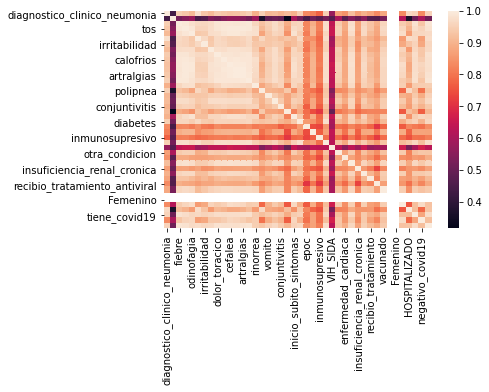

In [248]:
sns.heatmap(sinave_imss5.corr()) #no hay correlación aparente

In [249]:
sinave_imss5

,diagnostico_clinico_neumonia,esta_emabarazada,fiebre,tos,odinofagia,disnea,irritabilidad,diarrea,dolor_toracico,calofrios,...,recibio_tratamiento,recibio_tratamiento_antiviral,vacunado,Masculino,Femenino,Ambulatorio,HOSPITALIZADO,tiene_covid19,negativo_covid19,urgencia
fecha_ingreso,,,,,,,,,,,,,,,,,,,,,
2020-01-02,1,0,11,10,6,1,8,0,1,6,...,2,11,1,0,0,10,1,0,11,10
2020-01-03,0,0,7,7,4,0,3,1,1,5,...,0,6,0,0,0,7,0,0,7,6
2020-01-04,0,0,2,2,0,2,1,1,2,2,...,0,2,0,0,0,0,2,0,2,1
2020-01-05,2,0,4,4,0,4,2,1,3,2,...,0,3,1,0,0,0,4,0,4,3
2020-01-06,0,1,13,11,8,4,0,3,7,10,...,0,10,1,0,0,7,6,0,13,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-09-18,72,0,221,309,244,110,41,96,126,168,...,58,24,86,0,0,339,93,159,273,125
2020-09-19,42,2,132,162,104,101,28,48,72,78,...,17,15,26,0,0,151,86,93,144,113
2020-09-20,47,0,104,113,94,78,32,35,52,80,...,15,9,20,0,0,70,90,37,123,96


In [250]:
sinave_imss5.columns

Index(['diagnostico_clinico_neumonia', 'esta_emabarazada', 'fiebre', 'tos',
       'odinofagia', 'disnea', 'irritabilidad', 'diarrea', 'dolor_toracico',
       'calofrios', 'cefalea', 'mialgias', 'artralgias',
       'ataque_al_estado_general', 'rinorrea', 'polipnea', 'vomito',
       'dolor_abdominal', 'conjuntivitis', 'cianosis',
       'inicio_subito_sintomas', 'diabetes', 'epoc', 'asma', 'inmunosupresivo',
       'hipertension', 'VIH_SIDA', 'otra_condicion', 'enfermedad_cardiaca',
       'obesidad', 'insuficiencia_renal_cronica', 'tabaquismo',
       'recibio_tratamiento', 'recibio_tratamiento_antiviral', 'vacunado',
       'Masculino', 'Femenino', 'Ambulatorio', 'HOSPITALIZADO',
       'tiene_covid19', 'negativo_covid19', 'urgencia'],
      dtype='object')

In [251]:
#series de tiempo importo
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [252]:
sinave_imss5.index #la frecuencia es por día desde enero

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-11',
               ...
               '2020-09-13', '2020-09-14', '2020-09-15', '2020-09-16',
               '2020-09-17', '2020-09-18', '2020-09-19', '2020-09-20',
               '2020-09-21', '2020-09-22'],
              dtype='datetime64[ns]', name='fecha_ingreso', length=261, freq=None)

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


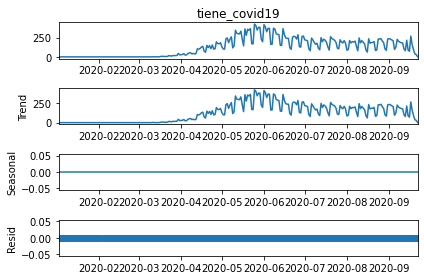

In [253]:
res = sm.tsa.seasonal_decompose(sinave_imss5['tiene_covid19'], freq=1)
resplot = res.plot()

In [254]:
#hago prueba de adfuller
from statsmodels.tsa.stattools import adfuller

In [255]:
adfuller(sinave_imss5['tiene_covid19']['2020-04-01':]) #no es estacionario :|

(-1.3573241725276604,
 0.6025559700938635,
 14,
 160,
 {'1%': -3.4718957209472654,
  '5%': -2.8797795410156253,
  '10%': -2.5764947265625},
 1619.5246126428128)

In [256]:
#agrego mes
import datetime
sinave_imss5['mes']=sinave_imss5.index.month


In [257]:
sinave_imss5.groupby('mes').agg({'tiene_covid19':'sum','negativo_covid19':'sum','HOSPITALIZADO':'sum','Ambulatorio':'sum'})

,tiene_covid19,negativo_covid19,HOSPITALIZADO,Ambulatorio
mes,,,,
1,0,278,118,160
2,0,171,68,103
3,218,1208,391,1035
4,2773,3379,2804,3348
5,8127,5754,6310,7571
6,7803,6545,4945,9403
7,5650,6238,3586,8302
8,5200,5378,3118,7460
9,3246,4326,2151,5421


# casos asociados al covid 19

In [57]:
#positivos imss
asociados= pd.read_csv('/Users/rube/Downloads/casos-asociados-a-covid-19.csv')
asociados

/usr/local/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (30,38,39) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,FECHA ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD UNIDAD MEDICA,SEXO,ENTIDAD NACIMIENTO,ENTIDAD RESIDENCIA,MUNICIPIO RESIDENCIA,TIPO PACIENTE,...,Negativo,MIGRANTE,PAIS NACIONALIDAD,PAIS ORIGEN,UNIDAD DE CUIDADOS INTENSIVOS,RANGO EDAD,num_fallecidos,num_hospitalizados,positivo,pendiente
0,2020-09-22,281c43,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,NO ESPECIFICADO,CIUDAD DE MÉXICO,Tláhuac,AMBULATORIO,...,No positivo SARS-CoV-2,NO,El Salvador,99.0,NO APLICA,31-40,NaN,NaN,NaN,NaN
1,2020-09-22,41e725,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,MÉXICO,NaN,AMBULATORIO,...,No positivo SARS-CoV-2,NO ESPECIFICADO,México,99.0,NO APLICA,31-40,NaN,NaN,NaN,NaN
2,2020-09-22,23b241,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,MÉXICO,NaN,AMBULATORIO,...,No positivo SARS-CoV-2,NO ESPECIFICADO,México,99.0,NO APLICA,41-50,NaN,NaN,NaN,NaN
3,2020-09-22,14329d,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Cuauhtémoc,AMBULATORIO,...,No positivo SARS-CoV-2,NO ESPECIFICADO,México,99.0,NO APLICA,21-30,NaN,NaN,NaN,NaN
4,2020-09-22,0ff605,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,MUJER,HIDALGO,CIUDAD DE MÉXICO,Milpa Alta,AMBULATORIO,...,No positivo SARS-CoV-2,NO ESPECIFICADO,México,99.0,NO APLICA,41-50,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402232,2020-09-22,35d9c9,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Gustavo A. Madero,AMBULATORIO,...,NaN,NO ESPECIFICADO,México,99.0,NO APLICA,21-30,NaN,NaN,NaN,Resultado pendiente
402233,2020-09-22,3cec58,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Iztapalapa,AMBULATORIO,...,NaN,NO ESPECIFICADO,México,99.0,NO APLICA,21-30,NaN,NaN,NaN,Resultado pendiente
402234,2020-09-22,456fad,USMER,SSA,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Tláhuac,AMBULATORIO,...,NaN,NO ESPECIFICADO,México,99.0,NO APLICA,41-50,NaN,NaN,NaN,Resultado pendiente
402235,2020-09-22,3bb89b,FUERA DE USMER,SSA,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Gustavo A. Madero,AMBULATORIO,...,NaN,NO ESPECIFICADO,México,99.0,NO APLICA,21-30,NaN,NaN,NaN,Resultado pendiente


In [58]:
asociados.dtypes

FECHA ACTUALIZACION               object
ID_REGISTRO                       object
ORIGEN                            object
SECTOR                            object
ENTIDAD UNIDAD MEDICA             object
SEXO                              object
ENTIDAD NACIMIENTO                object
ENTIDAD RESIDENCIA                object
MUNICIPIO RESIDENCIA              object
TIPO PACIENTE                     object
FECHA INGRESO                     object
FECHA SINTOMAS                    object
FECHA DEFUNCION                   object
INTUBADO                          object
NEUMONIA                          object
EDAD                               int64
NACIONALIDAD                      object
EMBARAZO                          object
HABLA LENGUA INDIGENA             object
DIABETES                          object
EPOC                              object
ASMA                              object
INMUNOSUPRESION                   object
HIPERTENSION                      object
OTRA COMPLICACIO

In [59]:
covimss= asociados[asociados['SECTOR']=='IMSS']
covimss

,FECHA ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD UNIDAD MEDICA,SEXO,ENTIDAD NACIMIENTO,ENTIDAD RESIDENCIA,MUNICIPIO RESIDENCIA,TIPO PACIENTE,...,Negativo,MIGRANTE,PAIS NACIONALIDAD,PAIS ORIGEN,UNIDAD DE CUIDADOS INTENSIVOS,RANGO EDAD,num_fallecidos,num_hospitalizados,positivo,pendiente
5,2020-09-22,089e07,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,MÉXICO,NaN,AMBULATORIO,...,No positivo SARS-CoV-2,NO ESPECIFICADO,México,99.0,NO APLICA,21-30,NaN,NaN,NaN,NaN
19,2020-09-22,0839b9,USMER,IMSS,CIUDAD DE MÉXICO,MUJER,MÉXICO,MÉXICO,NaN,AMBULATORIO,...,No positivo SARS-CoV-2,NO ESPECIFICADO,México,99.0,NO APLICA,51-60,NaN,NaN,NaN,NaN
20,2020-09-22,0681b5,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Álvaro Obregón,AMBULATORIO,...,No positivo SARS-CoV-2,NO ESPECIFICADO,México,99.0,NO APLICA,21-30,NaN,NaN,NaN,NaN
35,2020-09-22,10c6e1,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Coyoacán,AMBULATORIO,...,No positivo SARS-CoV-2,NO ESPECIFICADO,México,99.0,NO APLICA,41-50,NaN,NaN,NaN,NaN
45,2020-09-22,1d6480,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Miguel Hidalgo,AMBULATORIO,...,No positivo SARS-CoV-2,NO ESPECIFICADO,México,99.0,NO APLICA,41-50,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402207,2020-09-22,23e8cc,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,HOMBRE,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Gustavo A. Madero,HOSPITALIZADO,...,NaN,NO ESPECIFICADO,México,99.0,NO,61-70,NaN,1.0,NaN,Resultado pendiente
402209,2020-09-22,28a8aa,FUERA DE USMER,IMSS,CIUDAD DE MÉXICO,HOMBRE,MÉXICO,CIUDAD DE MÉXICO,Gustavo A. Madero,HOSPITALIZADO,...,NaN,NO ESPECIFICADO,México,99.0,NO,61-70,NaN,1.0,NaN,Resultado pendiente
402223,2020-09-22,33be1a,USMER,IMSS,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Iztapalapa,AMBULATORIO,...,NaN,NO ESPECIFICADO,México,99.0,NO APLICA,51-60,NaN,NaN,NaN,Resultado pendiente
402226,2020-09-22,3cbc3c,USMER,IMSS,CIUDAD DE MÉXICO,MUJER,CIUDAD DE MÉXICO,CIUDAD DE MÉXICO,Coyoacán,AMBULATORIO,...,NaN,NO ESPECIFICADO,México,99.0,NO APLICA,21-30,NaN,NaN,NaN,Resultado pendiente


In [60]:
covimss.isnull().sum()

FECHA ACTUALIZACION                  0
ID_REGISTRO                          0
ORIGEN                               0
SECTOR                               0
ENTIDAD UNIDAD MEDICA                0
SEXO                                 0
ENTIDAD NACIMIENTO                   0
ENTIDAD RESIDENCIA                   0
MUNICIPIO RESIDENCIA             11902
TIPO PACIENTE                        0
FECHA INGRESO                        0
FECHA SINTOMAS                       0
FECHA DEFUNCION                  54572
INTUBADO                             0
NEUMONIA                             0
EDAD                                 0
NACIONALIDAD                         0
EMBARAZO                             0
HABLA LENGUA INDIGENA                0
DIABETES                             0
EPOC                                 0
ASMA                                 0
INMUNOSUPRESION                      0
HIPERTENSION                         0
OTRA COMPLICACION                    0
CARDIOVASCULAR           

In [61]:
covimss['positivo'].value_counts()

Positivo SARS-CoV-2    33020
Name: positivo, dtype: int64

In [62]:
covimss['Negativo'].value_counts()

No positivo SARS-CoV-2    28401
Name: Negativo, dtype: int64

In [63]:
covimss.columns

Index(['FECHA ACTUALIZACION', 'ID_REGISTRO', 'ORIGEN', 'SECTOR',
       'ENTIDAD UNIDAD MEDICA', 'SEXO', 'ENTIDAD NACIMIENTO',
       'ENTIDAD RESIDENCIA', 'MUNICIPIO RESIDENCIA', 'TIPO PACIENTE',
       'FECHA INGRESO', 'FECHA SINTOMAS', 'FECHA DEFUNCION', 'INTUBADO',
       'NEUMONIA', 'EDAD', 'NACIONALIDAD', 'EMBARAZO', 'HABLA LENGUA INDIGENA',
       'DIABETES', 'EPOC', 'ASMA', 'INMUNOSUPRESION', 'HIPERTENSION',
       'OTRA COMPLICACION', 'CARDIOVASCULAR', 'OBESIDAD', 'RENAL CRONICA',
       'TABAQUISMO', 'OTRO CASO', 'Negativo', 'MIGRANTE', 'PAIS NACIONALIDAD',
       'PAIS ORIGEN', 'UNIDAD DE CUIDADOS INTENSIVOS', 'RANGO EDAD',
       'num_fallecidos', 'num_hospitalizados', 'positivo', 'pendiente'],
      dtype='object')

# Derechohabientes y asegurados

In [133]:
#Derechohabientes agosto 2020
data = pd.read_csv('/Users/rube/Downloads/pda-2020-08-31.csv', sep='|',engine='python')
data

,ID_DELEG_RP,ID_SUBDEL_RP,ID_UMF_RP,NOMBRE_UMF_RP,ST_TIT_FAM,ID_CALIDAD,CVE_SEXO,CVE_RANGO_EDAD,ST_CONSULTORIO,ID_TURNO,ID_CONSULTORIO,TOT_CASOS
0,1,1,2,UMF 002,1,1,1,E10,0,0,9998,7
1,1,1,2,UMF 002,1,1,1,E10,1,M,2,3
2,1,1,2,UMF 002,1,1,1,E10,1,M,3,4
3,1,1,2,UMF 002,1,1,1,E10,1,V,1,7
4,1,1,2,UMF 002,1,1,1,E10,1,V,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3174069,40,58,26,HGZMF 026,2,26,2,E7,1,V,13,1
3174070,40,58,26,HGZMF 026,2,40,1,ND,1,M,12,1
3174071,40,58,26,HGZMF 026,2,40,2,ND,1,M,19,1
3174072,40,58,26,HGZMF 026,2,40,2,ND,1,V,14,1


In [152]:
#cdmx
derecho_cdmx=(data[(data['ID_DELEG_RP']==39)|(data['ID_DELEG_RP']==40)])[['NOMBRE_UMF_RP','ST_TIT_FAM','CVE_SEXO','CVE_RANGO_EDAD','TOT_CASOS']]
derecho_ago= derecho_cdmx.reset_index(drop=True)
derecho_ago

,NOMBRE_UMF_RP,ST_TIT_FAM,CVE_SEXO,CVE_RANGO_EDAD,TOT_CASOS
0,UMF 020,1,1,E10,5
1,UMF 020,1,1,E10,2
2,UMF 020,1,1,E10,1
3,UMF 020,1,1,E10,3
4,UMF 020,1,1,E10,2
...,...,...,...,...,...
331172,HGZMF 026,2,2,E7,1
331173,HGZMF 026,2,1,ND,1
331174,HGZMF 026,2,2,ND,1
331175,HGZMF 026,2,2,ND,1


In [153]:
derecho_ago.isnull().sum() #no hay nulos

NOMBRE_UMF_RP     0
ST_TIT_FAM        0
CVE_SEXO          0
CVE_RANGO_EDAD    0
TOT_CASOS         0
dtype: int64

In [154]:
#borro edad desconocida
derecho_ago2=derecho_ago[derecho_ago['CVE_RANGO_EDAD']!='ND']
derecho_ago2.reset_index(drop=True)

,NOMBRE_UMF_RP,ST_TIT_FAM,CVE_SEXO,CVE_RANGO_EDAD,TOT_CASOS
0,UMF 020,1,1,E10,5
1,UMF 020,1,1,E10,2
2,UMF 020,1,1,E10,1
3,UMF 020,1,1,E10,3
4,UMF 020,1,1,E10,2
...,...,...,...,...,...
330339,HGZMF 026,2,2,E9,1
330340,HGZMF 026,2,1,E11,1
330341,HGZMF 026,2,2,E9,1
330342,HGZMF 026,2,1,E11,1


In [155]:
derecho_ago2['CVE_RANGO_EDAD']=derecho_ago2['CVE_RANGO_EDAD'].apply(lambda x:x.strip())

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [156]:
#actualizo edad
d_menor_de_25_años=['E0','E1','E2','E3','E4','E5','E6','E7','E8','E9','E10','E11','E12','E13','E14','E15']
d_de_25_a_40= ['E16','E17','E18']
d_de_40_a_65 = ['E19','E20','E21','E22','E23']
d_mas_de_65 = ['E24','E25','E26','E27','E28']

In [157]:
for i in d_menor_de_25_años:
    derecho_ago2['CVE_RANGO_EDAD']=derecho_ago2['CVE_RANGO_EDAD'].replace(i,'(<25)')
    
for i in d_de_25_a_40:
    derecho_ago2['CVE_RANGO_EDAD']=derecho_ago2['CVE_RANGO_EDAD'].replace(i,'(26-40)')
    
for i in d_de_40_a_65:
    derecho_ago2['CVE_RANGO_EDAD']=derecho_ago2['CVE_RANGO_EDAD'].replace(i,'(40-65)')
    
for i in d_mas_de_65:
    derecho_ago2['CVE_RANGO_EDAD']=derecho_ago2['CVE_RANGO_EDAD'].replace(i,'(>65)')
  

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

In [158]:
#actualizo sexo

derecho_ago2['CVE_SEXO']=np.where(derecho_ago2['CVE_SEXO']==1,'M','F')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [161]:
#actualizo ST_TIT_FAM

derecho_ago2['ST_TIT_FAM']=np.where(derecho_ago2['ST_TIT_FAM']==1,'Titular','beneficiario')

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [162]:
pd.crosstab(derecho_ago2['ST_TIT_FAM'],[derecho_ago2['CVE_SEXO'],derecho_ago2['CVE_RANGO_EDAD']])

CVE_SEXO             F                             M                      
CVE_RANGO_EDAD (26-40) (40-65)  (<25)  (>65) (26-40) (40-65)  (<25)  (>65)
ST_TIT_FAM                                                                
Titular           5495    9082  10042   9000    5518    9129  10081   8984
beneficiario     14201   29783  73826  20789   10045   24835  71300  18234

In [180]:
derecho_ago2.pivot_table(index=['ST_TIT_FAM','CVE_SEXO'],columns='CVE_RANGO_EDAD', values = 'TOT_CASOS', aggfunc = sum, margins=True )

CVE_RANGO_EDAD         (26-40)  (40-65)    (<25)    (>65)      All
ST_TIT_FAM   CVE_SEXO                                             
Titular      F          578828   538237   437115   247243  1801423
             M          680967   625531   453788   249129  2009415
beneficiario F          157189   463890   390333   359157  1370569
             M           26136   167413   394364   169335   757248
All                    1443120  1795071  1675600  1024864  5938655

# Patrones

In [81]:
%%time
#solo asegurados agosto
asegurados082020 = pd.read_csv('/Users/rube/Downloads/asg-2020-08-31.csv', sep='|',engine='python')

CPU times: user 2min 46s, sys: 2min 56s, total: 5min 42s
Wall time: 7min 50s


In [82]:

asegurados082020.head()

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tama�o_patron,sexo,rango_edad,...,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
0,1,1,1,A01,NaN,NaN,NaN,NaN,1,E1,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
1,1,1,1,A01,NaN,NaN,NaN,NaN,1,E10,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,A01,NaN,NaN,NaN,NaN,1,E11,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,A01,NaN,NaN,NaN,NaN,1,E12,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0
4,1,1,1,A01,NaN,NaN,NaN,NaN,1,E13,...,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0


In [83]:
asegurados082020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4472512 entries, 0 to 4472511
Data columns (total 29 columns):
 #   Column              Dtype  
---  ------              -----  
 0   cve_delegacion      int64  
 1   cve_subdelegacion   int64  
 2   cve_entidad         int64  
 3   cve_municipio       object 
 4   sector_economico_1  float64
 5   sector_economico_2  float64
 6   sector_economico_4  float64
 7   tama�o_patron       object 
 8   sexo                int64  
 9   rango_edad          object 
 10  rango_salarial      object 
 11  rango_uma           object 
 12  asegurados          int64  
 13  no_trabajadores     int64  
 14  ta                  int64  
 15  teu                 int64  
 16  tec                 int64  
 17  tpu                 int64  
 18  tpc                 int64  
 19  ta_sal              int64  
 20  teu_sal             int64  
 21  tec_sal             int64  
 22  tpu_sal             int64  
 23  tpc_sal             int64  
 24  masa_sal_ta         floa

In [84]:
#asegurados agosto cdmx
asegurados_cdmx_agosto2020 =(asegurados082020[asegurados082020['cve_entidad']==9]).reset_index(drop=True)
asegurados_cdmx_agosto2020

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tama�o_patron,sexo,rango_edad,...,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
0,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E1,...,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
1,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E10,...,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
2,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E11,...,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
3,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E12,...,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
4,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E13,...,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505666,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E6,...,1,0,0,1,0,1374.11,0.00,0.0,1374.11,0.0
505667,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E6,...,1,1,0,0,0,291.87,291.87,0.0,0.00,0.0
505668,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E6,...,1,1,0,0,0,533.72,533.72,0.0,0.00,0.0
505669,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E8,...,1,0,0,1,0,2172.00,0.00,0.0,2172.00,0.0


In [85]:
asegurados_cdmx_agosto2020.isnull().sum()

cve_delegacion             0
cve_subdelegacion          0
cve_entidad                0
cve_municipio         505671
sector_economico_1       280
sector_economico_2       280
sector_economico_4       280
tama�o_patron           1318
sexo                       0
rango_edad                 0
rango_salarial           716
rango_uma                716
asegurados                 0
no_trabajadores            0
ta                         0
teu                        0
tec                        0
tpu                        0
tpc                        0
ta_sal                     0
teu_sal                    0
tec_sal                    0
tpu_sal                    0
tpc_sal                    0
masa_sal_ta                0
masa_sal_teu               0
masa_sal_tec               0
masa_sal_tpu               0
masa_sal_tpc               0
dtype: int64

In [86]:
asegurados_cdmx_agosto2020.columns

Index(['cve_delegacion', 'cve_subdelegacion', 'cve_entidad', 'cve_municipio',
       'sector_economico_1', 'sector_economico_2', 'sector_economico_4',
       'tama�o_patron', 'sexo', 'rango_edad', 'rango_salarial', 'rango_uma',
       'asegurados', 'no_trabajadores', 'ta', 'teu', 'tec', 'tpu', 'tpc',
       'ta_sal', 'teu_sal', 'tec_sal', 'tpu_sal', 'tpc_sal', 'masa_sal_ta',
       'masa_sal_teu', 'masa_sal_tec', 'masa_sal_tpu', 'masa_sal_tpc'],
      dtype='object')

In [87]:
asegurados_cdmx_agosto2020[['ta', 'teu', 'tec', 'tpu', 'tpc',
       'ta_sal', 'teu_sal', 'tec_sal', 'tpu_sal', 'tpc_sal', 'masa_sal_ta',
       'masa_sal_teu', 'masa_sal_tec', 'masa_sal_tpu', 'masa_sal_tpc']]

,ta,teu,tec,tpu,tpc,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
0,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
1,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
2,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
3,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
4,0,0,0,0,0,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505666,1,0,0,1,0,1,0,0,1,0,1374.11,0.00,0.0,1374.11,0.0
505667,1,1,0,0,0,1,1,0,0,0,291.87,291.87,0.0,0.00,0.0
505668,1,1,0,0,0,1,1,0,0,0,533.72,533.72,0.0,0.00,0.0
505669,1,0,0,1,0,1,0,0,1,0,2172.00,0.00,0.0,2172.00,0.0


In [88]:
#renombro de acuerdo a glosario del imss
asegurados_cdmx_agosto2020.rename(columns= {'ta':'ta_puestos_trabajo', 'teu':'teu_eventual_urbano', 
                                            'tec':'tec_eventual_campo',
                                            'tpu':'tpu_permanente_urbano', 'tpc':'tpc_permanente_campo'})

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tama�o_patron,sexo,rango_edad,...,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
0,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E1,...,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
1,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E10,...,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
2,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E11,...,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
3,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E12,...,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
4,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E13,...,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505666,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E6,...,1,0,0,1,0,1374.11,0.00,0.0,1374.11,0.0
505667,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E6,...,1,1,0,0,0,291.87,291.87,0.0,0.00,0.0
505668,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E6,...,1,1,0,0,0,533.72,533.72,0.0,0.00,0.0
505669,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E8,...,1,0,0,1,0,2172.00,0.00,0.0,2172.00,0.0


In [89]:
asegurados_cdmx_agosto2020[['masa_sal_ta','masa_sal_teu', 'masa_sal_tec', 'masa_sal_tpu', 'masa_sal_tpc']]

,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
0,0.00,0.00,0.0,0.00,0.0
1,0.00,0.00,0.0,0.00,0.0
2,0.00,0.00,0.0,0.00,0.0
3,0.00,0.00,0.0,0.00,0.0
4,0.00,0.00,0.0,0.00,0.0
...,...,...,...,...,...
505666,1374.11,0.00,0.0,1374.11,0.0
505667,291.87,291.87,0.0,0.00,0.0
505668,533.72,533.72,0.0,0.00,0.0
505669,2172.00,0.00,0.0,2172.00,0.0


In [90]:
asegurados_cdmx_agosto2020.dtypes

cve_delegacion          int64
cve_subdelegacion       int64
cve_entidad             int64
cve_municipio          object
sector_economico_1    float64
sector_economico_2    float64
sector_economico_4    float64
tama�o_patron          object
sexo                    int64
rango_edad             object
rango_salarial         object
rango_uma              object
asegurados              int64
no_trabajadores         int64
ta                      int64
teu                     int64
tec                     int64
tpu                     int64
tpc                     int64
ta_sal                  int64
teu_sal                 int64
tec_sal                 int64
tpu_sal                 int64
tpc_sal                 int64
masa_sal_ta           float64
masa_sal_teu          float64
masa_sal_tec          float64
masa_sal_tpu          float64
masa_sal_tpc          float64
dtype: object

In [91]:
asegurados_cdmx_agosto2020

,cve_delegacion,cve_subdelegacion,cve_entidad,cve_municipio,sector_economico_1,sector_economico_2,sector_economico_4,tama�o_patron,sexo,rango_edad,...,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
0,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E1,...,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
1,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E10,...,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
2,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E11,...,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
3,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E12,...,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
4,39,11,9,NaN,NaN,NaN,NaN,NaN,1,E13,...,0,0,0,0,0,0.00,0.00,0.0,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
505666,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E6,...,1,0,0,1,0,1374.11,0.00,0.0,1374.11,0.0
505667,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E6,...,1,1,0,0,0,291.87,291.87,0.0,0.00,0.0
505668,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E6,...,1,1,0,0,0,533.72,533.72,0.0,0.00,0.0
505669,40,58,9,NaN,9.0,99.0,9900.0,S3,2,E8,...,1,0,0,1,0,2172.00,0.00,0.0,2172.00,0.0


In [92]:
asegurados_cdmx_agosto2020['sector_economico_4'].value_counts()

8401.0    30557
9101.0    13959
8100.0    13108
6711.0    10424
6103.0     9716
          ...  
8910.0        6
500.0         6
3012.0        4
6617.0        2
3315.0        1
Name: sector_economico_4, Length: 272, dtype: int64

In [93]:
asegurados_cdmx_agosto2020['sector_economico_2'].value_counts()

84.0    44718
62.0    37962
67.0    35081
89.0    24762
66.0    21383
        ...  
13.0      286
11.0      257
4.0        67
3.0        29
5.0         6
Name: sector_economico_2, Length: 61, dtype: int64

In [94]:
#sector economico 2 y 4 son muy especificos, se puede quedar solo con sector economico 1
asegurados_cdmx_agosto2020['sector_economico_1'].value_counts()

6.0    156534
8.0    124582
3.0    106255
9.0     46148
7.0     36805
4.0     29196
5.0      2959
0.0      1847
1.0      1065
Name: sector_economico_1, dtype: int64

In [95]:
asegurados_cdmx_agosto2020['rango_salarial'].value_counts()

W2     133889
W3      83713
W4      52120
W5      41953
W6      31686
W7      24470
W8      21525
W9      17841
W18     16173
W10     15824
W11     12724
W12     11231
W13      9640
W15      8306
W14      8286
W16      7184
W17      6839
W1       1551
Name: rango_salarial, dtype: int64

In [96]:
asegurados_cdmx_agosto2020['tama�o_patron'].value_counts() #categorica

S3    138398
S4    135400
S5     69111
S7     50500
S2     50079
S6     44370
S1     16495
Name: tama�o_patron, dtype: int64

In [97]:
asegurados_cdmx_agosto2020['sexo']=np.where(asegurados_cdmx_agosto2020['sexo']==1,'M','F')


In [98]:
#borro columnas que no sirven 

asegurados_cdmx_agosto2020.drop(['cve_delegacion', 'cve_subdelegacion', 'cve_entidad', 'cve_municipio','rango_uma',
                                'sector_economico_2', 'sector_economico_4'], axis=1, inplace=True)

In [99]:
#los vacío es dificil de interpretar por lo que se borran
asegurados_cdmx_agosto2020.dropna(axis=0, inplace=True)

In [100]:
asegurados_cdmx_agosto2020_2=asegurados_cdmx_agosto2020.reset_index(drop=True)
asegurados_cdmx_agosto2020_2

,sector_economico_1,tama�o_patron,sexo,rango_edad,rango_salarial,asegurados,no_trabajadores,ta,teu,tec,...,ta_sal,teu_sal,tec_sal,tpu_sal,tpc_sal,masa_sal_ta,masa_sal_teu,masa_sal_tec,masa_sal_tpu,masa_sal_tpc
0,0.0,S1,M,E5,W3,1,0,1,0,0,...,1,0,0,1,0,278.72,0.00,0.0,278.72,0.0
1,0.0,S1,M,E7,W4,1,0,1,0,0,...,1,0,0,1,0,386.84,0.00,0.0,386.84,0.0
2,0.0,S3,M,E10,W2,3,0,3,0,0,...,3,0,0,3,0,390.87,0.00,0.0,390.87,0.0
3,0.0,S3,M,E11,W2,1,0,1,0,0,...,1,0,0,1,0,165.79,0.00,0.0,165.79,0.0
4,0.0,S3,M,E12,W2,2,0,2,0,0,...,2,0,0,2,0,345.12,0.00,0.0,345.12,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504115,9.0,S3,F,E6,W12,1,0,1,0,0,...,1,0,0,1,0,1374.11,0.00,0.0,1374.11,0.0
504116,9.0,S3,F,E6,W3,1,0,1,1,0,...,1,1,0,0,0,291.87,291.87,0.0,0.00,0.0
504117,9.0,S3,F,E6,W5,1,0,1,1,0,...,1,1,0,0,0,533.72,533.72,0.0,0.00,0.0
504118,9.0,S3,F,E8,W18,1,0,1,0,0,...,1,0,0,1,0,2172.00,0.00,0.0,2172.00,0.0


In [101]:
asegurados_cdmx_agosto2020_2['asegurados'].value_counts()

1      241494
2       81507
3       41629
4       26153
5       17657
        ...  
574         1
573         1
895         1
448         1
767         1
Name: asegurados, Length: 675, dtype: int64

In [102]:

#menor_a_6 =
#asegurados_cdmx_agosto2020_2['rango_salarial']=asegurados_cdmx_agosto2020_2['rango_salarial'].replace('W1','menor 6')
#asegurados_cdmx_agosto2020_2['rango_salarial']=asegurados_cdmx_agosto2020_2['rango_salarial'].replace('W2','menor 6')
#asegurados_cdmx_agosto2020_2['rango_salarial']=asegurados_cdmx_agosto2020_2['rango_salarial'].replace('W3','menor 6')
#asegurados_cdmx_agosto2020_2['rango_salarial']=asegurados_cdmx_agosto2020_2['rango_salarial'].replace('W4','menor 6')
#asegurados_cdmx_agosto2020_2['rango_salarial']=asegurados_cdmx_agosto2020_2['rango_salarial'].replace('W5','menor 6')
#asegurados_cdmx_agosto2020_2['rango_salarial']=asegurados_cdmx_agosto2020_2['rango_salarial'].replace('W6','de 6 a 12')


In [103]:
#actualizo variables de rango salarial
menor_a_6 =['W1','W2','W3','W4','W5']
de_6_a_12 = ['W6','W7','W8','W9','W10','W11']
mayor_a_12= ['W12','W13','W14','W15','W16','W17', 'W18', 'W19', 'W20','W21','W22','W23','W24','W25']

In [104]:
for i in menor_a_6:
    asegurados_cdmx_agosto2020_2['rango_salarial']=asegurados_cdmx_agosto2020_2['rango_salarial'].replace(i,'menor 6')

In [105]:
for i in de_6_a_12:
    asegurados_cdmx_agosto2020_2['rango_salarial']=asegurados_cdmx_agosto2020_2['rango_salarial'].replace(i,'6 a 12')

In [106]:
for i in mayor_a_12:
    asegurados_cdmx_agosto2020_2['rango_salarial']=asegurados_cdmx_agosto2020_2['rango_salarial'].replace(i,'mayor a 12')

In [107]:
#Actualizo tamaño de patron
menor_a_5 = ['S1','S2']
de_6_a_50 = ['S3']
de_51_a_500= ['S4','S5']
mayor_500= ['S6','S7']



In [108]:
for i in menor_a_5:
    asegurados_cdmx_agosto2020_2['tama�o_patron']=asegurados_cdmx_agosto2020_2['tama�o_patron'].replace(i,'S1-S2(<5)')
    
    
for i in de_6_a_50:
    asegurados_cdmx_agosto2020_2['tama�o_patron']=asegurados_cdmx_agosto2020_2['tama�o_patron'].replace(i,'S3(<50)')
    
    
for i in de_51_a_500:
     asegurados_cdmx_agosto2020_2['tama�o_patron']=asegurados_cdmx_agosto2020_2['tama�o_patron'].replace(i,'S4-S5(51-500)')
        


In [109]:
for i in mayor_500:
    asegurados_cdmx_agosto2020_2['tama�o_patron']=asegurados_cdmx_agosto2020_2['tama�o_patron'].replace(i,'>S6(>500)')
        

In [110]:
#actualizo edad
menor_de_25_años=['E1','E2','E3']
de_25_a_40= ['E4','E5','E6']
de_40_a_65 = ['E7','E8','E9','E10','E11']
mas_de_65 = ['E12','E13','E14']


In [111]:
for i in menor_de_25_años:
    asegurados_cdmx_agosto2020_2['rango_edad']=asegurados_cdmx_agosto2020_2['rango_edad'].replace(i,'E1-E3(<25)')
    
for i in de_25_a_40:
    asegurados_cdmx_agosto2020_2['rango_edad']=asegurados_cdmx_agosto2020_2['rango_edad'].replace(i,'E4-E6(26-40)')
    
for i in de_40_a_65:
    asegurados_cdmx_agosto2020_2['rango_edad']=asegurados_cdmx_agosto2020_2['rango_edad'].replace(i,'E7-E11(40-65)')
    
for i in mas_de_65:
    asegurados_cdmx_agosto2020_2['rango_edad']=asegurados_cdmx_agosto2020_2['rango_edad'].replace(i,'E12-E14(>65)')
  

In [187]:
#actualizo sector
def sec(x):
    sector={0:'agricultura',1:'extractiva',3:'transformación',4:'construcción',5:'energía_agua',6:'comercio',7:'transporte',8:'servicios_lucrativos', 9:'servicios_sociales'}

    return sector[x]

In [189]:
asegurados_cdmx_agosto2020_2['sector_economico_1']=asegurados_cdmx_agosto2020_2['sector_economico_1'].apply(sec)

In [191]:
asegurados_cdmx_agosto2020_2.pivot_table(index = ['sexo','rango_salarial'], columns='sector_economico_1', values = 'asegurados', aggfunc = sum, margins=True)

sector_economico_1   agricultura  comercio  construcción  energía_agua  \
sexo rango_salarial                                                      
F    6 a 12                  846     31874          3475          2124   
     mayor a 12               43     17209          1302           773   
     menor 6                2032    232063         37342           488   
M    6 a 12                  971     49178         16511          7399   
     mayor a 12              108     32499          5182          3216   
     menor 6                3324    304132        177351          1369   
All                         7324    666955        241163         15369   

sector_economico_1   extractiva  servicios_lucrativos  servicios_sociales  \
sexo rango_salarial                                                         
F    6 a 12                 132                 97060               44707   
     mayor a 12             148                 57408               13890   
     menor 6                312                484075              113867   
M    6 a 12                 254                120735               26542   
     mayor a 12             491                104231               13468   
     menor 6               1100                584211               73825   
All                        2437               1447720              286299   

sector_economico_1   transformación  transporte      All  
sexo rango_salarial                                       
F    6 a 12                   17015       15992   213225  
     mayor a 12                9941        5963   106677  
     menor 6                 118372       36077  1024628  
M    6 a 12                   35508       25986   283084  
     mayor a 12               18238       18635   196068  
     menor 6                 176401       98897  1420610  
All                          375475      201550  3244292

In [113]:
asegurados_cdmx_agosto2020_2.isnull().sum()

sector_economico_1    0
tama�o_patron         0
sexo                  0
rango_edad            0
rango_salarial        0
asegurados            0
no_trabajadores       0
ta                    0
teu                   0
tec                   0
tpu                   0
tpc                   0
ta_sal                0
teu_sal               0
tec_sal               0
tpu_sal               0
tpc_sal               0
masa_sal_ta           0
masa_sal_teu          0
masa_sal_tec          0
masa_sal_tpu          0
masa_sal_tpc          0
dtype: int64

In [114]:
asegurados_cdmx_agosto2020_2.dtypes #4 variables categoricas que podría convertir a dummies

sector_economico_1    float64
tama�o_patron          object
sexo                   object
rango_edad             object
rango_salarial         object
asegurados              int64
no_trabajadores         int64
ta                      int64
teu                     int64
tec                     int64
tpu                     int64
tpc                     int64
ta_sal                  int64
teu_sal                 int64
tec_sal                 int64
tpu_sal                 int64
tpc_sal                 int64
masa_sal_ta           float64
masa_sal_teu          float64
masa_sal_tec          float64
masa_sal_tpu          float64
masa_sal_tpc          float64
dtype: object

In [115]:
tamaño_patron=pd.get_dummies(asegurados_cdmx_agosto2020_2['tama�o_patron'])
tamaño_patron

,>S6(>500),S1-S2(<5),S3(<50),S4-S5(51-500)
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,1,0
...,...,...,...,...
504115,0,0,1,0
504116,0,0,1,0
504117,0,0,1,0
504118,0,0,1,0


In [116]:
rango_salario=pd.get_dummies(asegurados_cdmx_agosto2020_2['rango_salarial'])
rango_salario

,6 a 12,mayor a 12,menor 6
0,0,0,1
1,0,0,1
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
504115,0,1,0
504116,0,0,1
504117,0,0,1
504118,0,1,0


In [117]:
edad = pd.get_dummies(asegurados_cdmx_agosto2020_2['rango_edad'])
edad

,E1-E3(<25),E12-E14(>65),E4-E6(26-40),E7-E11(40-65)
0,0,0,1,0
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,1,0,0
...,...,...,...,...
504115,0,0,1,0
504116,0,0,1,0
504117,0,0,1,0
504118,0,0,0,1


In [118]:
columnas={0:'agricultura',1:'extractiva',3:'transformación',4:'construcción',5:'energía_agua',6:'comercio',7:'transporte',8:'servicios_lucrativos', 9:'servicios_sociales'}
economico=pd.get_dummies(asegurados_cdmx_agosto2020_2['sector_economico_1'])
economico.rename(columns=columnas, inplace=True)
economico

,agricultura,extractiva,transformación,construcción,energía_agua,comercio,transporte,servicios_lucrativos,servicios_sociales
0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
504115,0,0,0,0,0,0,0,0,1
504116,0,0,0,0,0,0,0,0,1
504117,0,0,0,0,0,0,0,0,1
504118,0,0,0,0,0,0,0,0,1
